## Histogram interaction number

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Formatting instructions for plots
from matplotlib import rcParams
%config InlineBackend.figure_format = 'retina'
params= {'text.latex.preamble' : [ "\\usepackage{times}",
        "\\usepackage[T1]{fontenc}",
        "\\usepackage{bm}",
        "\\usepackage{amsmath}",
        "\\usepackage{amssymb}",]}
plt.rcParams.update(params)
#plt.rcParams['figure.figsize'] = (18,14)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 17
plt.rc('axes', titlesize=30, labelsize = 22)
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels


/usr0/home/rschmuck/miniconda3/envs/vedu/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


### Select experiments

In [3]:
DATASETS = ["squirrel", "ednet_kt3", "eedi", "junyi_15"]
DATASET_NAMES = {
    "squirrel": "Squirrel",
    "ednet_kt3": "EdNet KT3",
    "eedi": "Eedi",
    "junyi_15": "Junyi15"
}

In [4]:
# determine interaction numbers
# path = "./../../data/" + dataset + "/preparation/preprocessed_data.csv"
# df = pd.read_csv(path, sep="\t")
# vcs = df["user_id"].value_counts()
# interactions = vcs.values

In [5]:
ints = {}
for d in DATASETS:
    print(d)
    path = "./../../data/" + d + "/preparation/preprocessed_data.csv"
    df = pd.read_csv(path, sep="\t")

    vcs = df["user_id"].value_counts()
    ints[d] = vcs.values
    print(np.sum(ints[d] <= 50))

squirrel
28068
ednet_kt3
59299
eedi
3412
junyi_15
63432


squirrel
27541
ednet_kt3
58853
eedi
0
junyi_15
62758


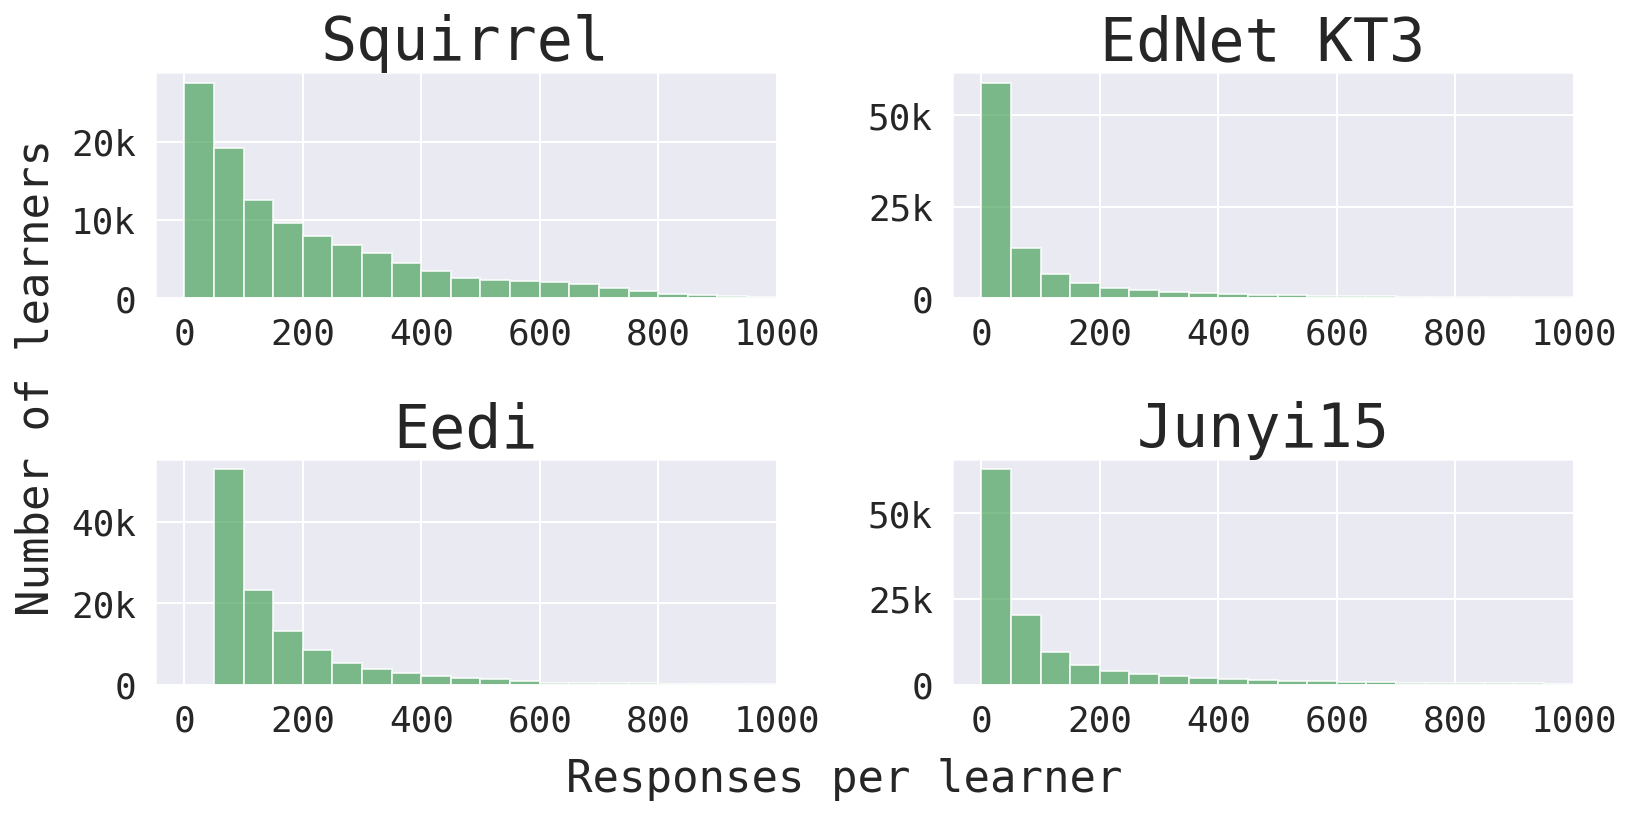

In [6]:
# plot histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
DATASETS = ["squirrel", "ednet_kt3", "eedi", "junyi_15"]

for i, d in enumerate(DATASETS):
    print(d)
    interactions = ints[d] 
    if d == "eedi":
        interactions = ints[d]
    print(np.sum(interactions < 50))

    bins = [50 * (i - 1) for i in range(50)]
    n, bins, patches = axs[i // 2][i % 2].hist(interactions, bins, density=False, facecolor='g', alpha=0.75)
    axs[i // 2][i % 2].title.set_text(DATASET_NAMES[d])
    axs[i // 2][i % 2].set_xlim(-50, 1000)
    axs[i // 2][i % 2].set_xticks([0, 200, 400, 600, 800, 1000])
    # plt.grid(True)

# squirrel
axs[0][0].set_yticks([0, 10000, 20000]) 
axs[0][0].set_yticklabels(["0", "10k", "20k"])

# ednet kt3
axs[0][1].set_yticks([0, 25000, 50000]) 
axs[0][1].set_yticklabels(["0", "25k", "50k"])

# eedi
axs[1][0].set_yticks([0, 20000, 40000]) 
axs[1][0].set_yticklabels(["0", "20k", "40k"])

# junyi15
axs[1][1].set_yticks([0, 25000, 50000]) 
axs[1][1].set_yticklabels(["0", "25k", "50k"])


fig.text(0.5, 0.02, 'Responses per student', ha='center')
fig.text(0.02, 0.5, 'Number of students' , va='center', rotation='vertical')
plt.tight_layout(rect=(0.025, 0.025, 0.975, 0.975))

plt.savefig("interaction_hist.pdf")
plt.show()


### Plot sequence variance

In [7]:
# How good is item/skill id in predicting the next item/skill

item_prob = {
    "squirrel": 0.18451937506731023,
    "ednet_kt3": 0.11802905413109235,
    "eedi": 0.73360056381676,
    "junyi_15": 0.7523697086584203
}

skill_prob = {
    "squirrel": 0.5084045652141502 ,
    "ednet_kt3": 0.09674344667612654,
    "eedi": 0.5485615619365809 ,
    "junyi_15": 0.9362486440022857
}

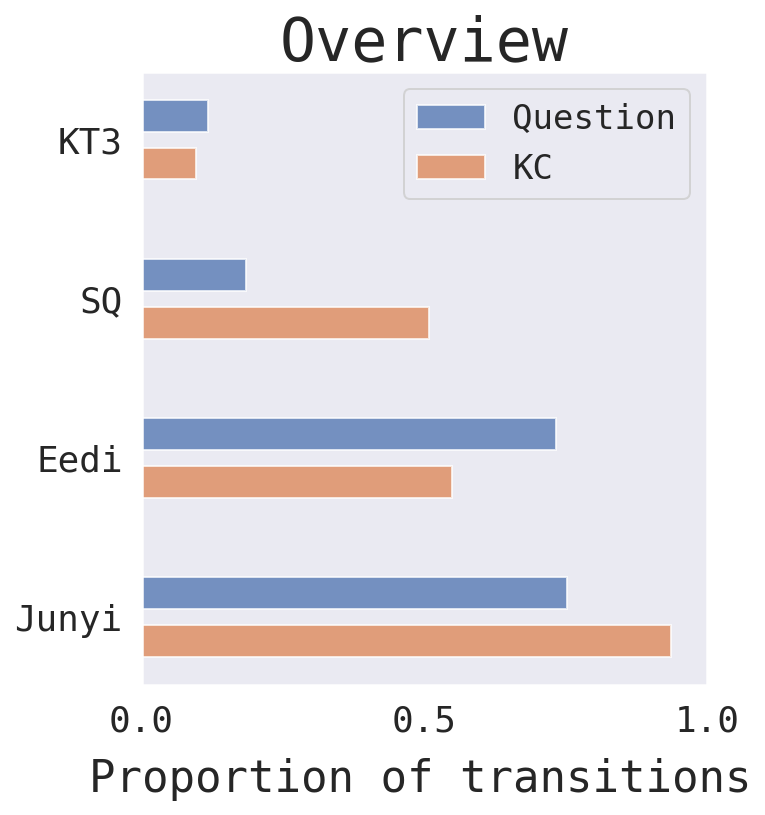

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
bar_width = 0.2
shift = 0.15
y_pos = np.array([1, 2, 3, 4])


DATASETS = ["ednet_kt3", "squirrel", "eedi", "junyi_15"]

names = ["KT3", "SQ", "Eedi", "Junyi"]
i_prob = []
s_prob = []
for d in DATASETS:
    i_prob.append(item_prob[d])
    s_prob.append(skill_prob[d])

# Example data
ax.barh(y_pos - shift, i_prob, bar_width, align='center', label="Question", alpha=0.75)
ax.barh(y_pos + shift, s_prob, bar_width, align='center', label="KC", alpha=0.75)

ax.set_xlim(0, 1)
ax.set_xticks([0, 0.5, 1.0])

ax.set_yticks(y_pos)
ax.set_yticklabels(names)
# ax.set_xlabel('Proportion of transitions')

ax.title.set_text("Overview")
ax.invert_yaxis()  # labels read top-to-bottom
ax.grid(False)
ax.legend()

fig.text(0.55, 0.02, 'Proportion of transitions', ha='center')
plt.tight_layout(rect=(0.025, 0.025, 0.975, 0.975))
plt.savefig("sequence_prob.pdf")
plt.show()